# Importing essential libraries

In [1]:
pip install yellowbrick

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import yellowbrick as yb
from yellowbrick.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

%matplotlib inline

In [2]:
data=pd.read_csv("dataset_full.csv")
display(data)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


# 2. Data Description

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [5]:
data.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


In [3]:
print("Column with constant values are:")
for column in data.columns:
            if data[column].unique().any()==True:
                continue
            else:
                print(column)
                data.drop(columns=column, inplace=True)

Column with constant values are:
qty_slash_domain
qty_questionmark_domain
qty_equal_domain
qty_and_domain
qty_exclamation_domain
qty_space_domain
qty_tilde_domain
qty_comma_domain
qty_plus_domain
qty_asterisk_domain
qty_hashtag_domain
qty_dollar_domain
qty_percent_domain


1. No categorical features. 
2. Wide range of numerical values. 

# 3. Splitting Data
   
   To avoid overfitting, it's best to split data prior to performing EDA. 

In [4]:
X=data.drop("phishing",axis=1)
y=data["phishing"].copy()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
55124,2,0,0,0,0,0,0,0,0,0,...,611,1,4,5,43200,0,0,0,0,0
44575,3,0,0,0,0,0,0,0,0,0,...,2308,1,2,5,14399,1,1,0,0,0
87793,2,0,0,0,0,0,0,0,0,0,...,-1,1,4,0,292,1,0,0,0,0
5689,2,0,0,0,0,0,0,0,0,0,...,2400,1,3,1,3600,1,1,0,0,0
38932,2,0,0,0,0,0,0,0,0,0,...,104,1,2,1,21596,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2,0,0,0,0,0,0,0,0,0,...,1025,1,2,5,300,1,0,0,0,0
54886,3,0,0,1,0,0,0,0,0,0,...,-1,1,2,1,3592,0,2,0,0,0
76820,1,1,2,6,0,0,0,0,0,0,...,132,1,4,1,9221,0,0,0,0,0
860,2,0,0,0,0,0,0,0,0,0,...,716,1,3,4,14398,1,1,0,0,0


In [17]:
X_test

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
29026,4,0,0,0,0,0,0,0,0,0,...,-1,1,3,1,3598,0,-1,0,0,0
52848,2,0,0,0,0,0,0,0,0,0,...,256,1,2,1,3598,1,0,0,0,0
3821,2,0,0,0,0,0,0,0,0,0,...,165,2,2,0,299,1,0,0,0,0
74221,4,0,0,0,0,0,0,0,0,0,...,-1,1,3,3,3585,0,0,0,0,0
34258,2,0,0,0,0,0,0,0,0,0,...,-1,-1,8,1,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18106,1,0,0,3,0,0,0,0,0,0,...,2,1,2,2,596,0,1,0,0,0
42253,2,0,0,0,0,0,0,0,0,0,...,2896,1,2,1,3598,1,0,0,0,0
27839,1,5,0,2,0,0,0,0,0,0,...,1648,2,2,2,292,1,0,0,0,0
18370,2,0,0,0,0,0,0,0,0,0,...,1025,1,4,1,288,0,1,0,0,0


In [10]:
y_train

55124    0
44575    0
87793    0
5689     0
38932    0
        ..
6265     0
54886    1
76820    1
860      0
15795    0
Name: phishing, Length: 70917, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'qty_dot_domain'),
  Text(1, 0, 'qty_hyphen_domain'),
  Text(2, 0, 'qty_underline_domain'),
  Text(3, 0, 'qty_at_domain'),
  Text(4, 0, 'qty_vowels_domain'),
  Text(5, 0, 'domain_length'),
  Text(6, 0, 'domain_in_ip'),
  Text(7, 0, 'server_client_domain'),
  Text(8, 0, 'domain_spf'),
  Text(9, 0, 'time_domain_activation'),
  Text(10, 0, 'time_domain_expiration'),
  Text(11, 0, 'domain_google_index')])

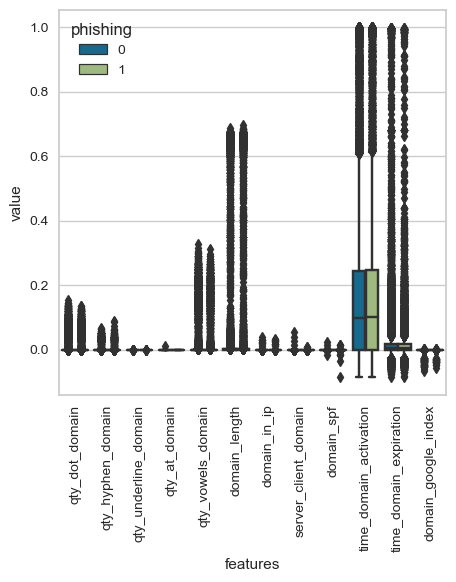

In [15]:
selected_columns = X_train_modified.columns[X_train_modified.columns.str.contains('domain', case=False)]
data = pd.concat([y,X_train_modified[selected_columns]],axis=1)
data = pd.melt(data,id_vars="phishing",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(5,5))
sns.boxplot(x="features", y="value", hue="phishing", data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'qty_dot_url'),
  Text(1, 0, 'qty_hyphen_url'),
  Text(2, 0, 'qty_underline_url'),
  Text(3, 0, 'qty_slash_url'),
  Text(4, 0, 'qty_questionmark_url'),
  Text(5, 0, 'qty_equal_url'),
  Text(6, 0, 'qty_at_url'),
  Text(7, 0, 'qty_and_url'),
  Text(8, 0, 'qty_exclamation_url'),
  Text(9, 0, 'qty_space_url'),
  Text(10, 0, 'qty_tilde_url'),
  Text(11, 0, 'qty_comma_url'),
  Text(12, 0, 'qty_plus_url'),
  Text(13, 0, 'qty_asterisk_url'),
  Text(14, 0, 'qty_hashtag_url'),
  Text(15, 0, 'qty_dollar_url'),
  Text(16, 0, 'qty_percent_url'),
  Text(17, 0, 'qty_tld_url'),
  Text(18, 0, 'length_url'),
  Text(19, 0, 'email_in_url'),
  Text(20, 0, 'url_google_index'),
  Text(21, 0, 'url_shortened')])

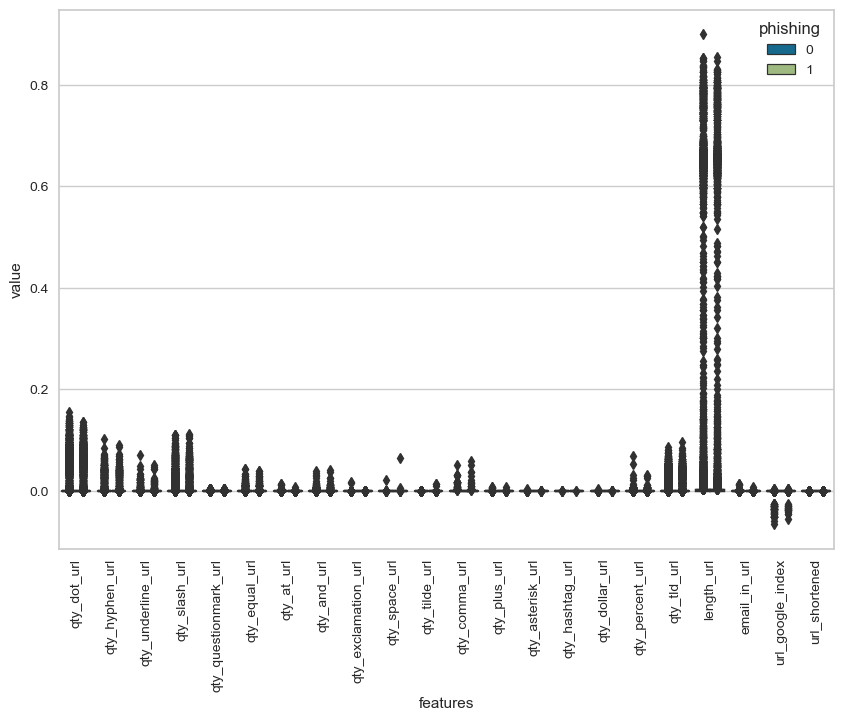

In [18]:
url_features=[col for col in X_train.columns if 'url' in col.lower()]
data_url = pd.concat([y,X_train_modified[url_features]],axis=1)
data_url = pd.melt(data_url,id_vars="phishing",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,7))
sns.boxplot(x="features", y="value", hue="phishing", data=data_url)
plt.xticks(rotation=90)

<Axes: >

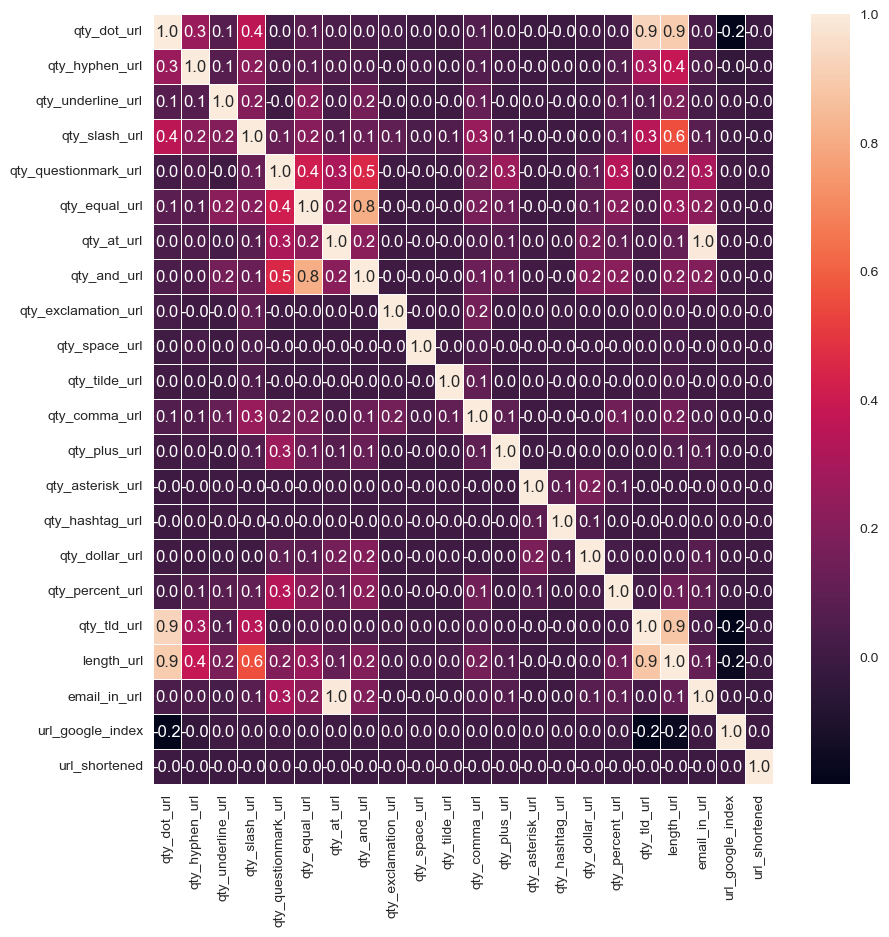

In [19]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X_train_modified[url_features].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'qty_dot_file'),
  Text(1, 0, 'qty_hyphen_file'),
  Text(2, 0, 'qty_underline_file'),
  Text(3, 0, 'qty_slash_file'),
  Text(4, 0, 'qty_questionmark_file'),
  Text(5, 0, 'qty_equal_file'),
  Text(6, 0, 'qty_at_file'),
  Text(7, 0, 'qty_and_file'),
  Text(8, 0, 'qty_exclamation_file'),
  Text(9, 0, 'qty_space_file'),
  Text(10, 0, 'qty_tilde_file'),
  Text(11, 0, 'qty_comma_file'),
  Text(12, 0, 'qty_plus_file'),
  Text(13, 0, 'qty_asterisk_file'),
  Text(14, 0, 'qty_hashtag_file'),
  Text(15, 0, 'qty_dollar_file'),
  Text(16, 0, 'qty_percent_file'),
  Text(17, 0, 'file_length')])

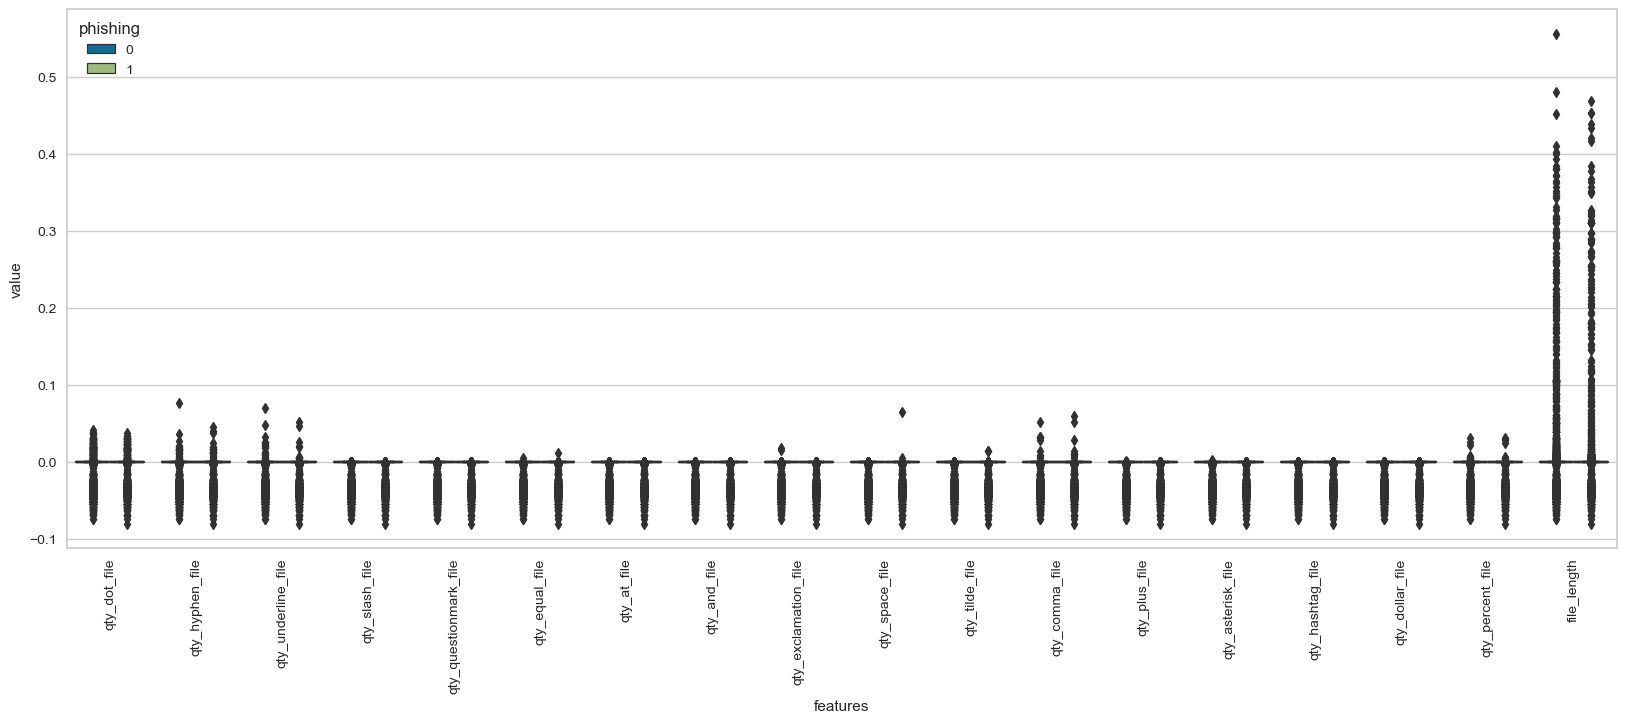

In [20]:
file_features=[col for col in X_train.columns if 'file' in col.lower()]
data_url = pd.concat([y,X_train_modified[file_features]],axis=1)
data_url = pd.melt(data_url,id_vars="phishing",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,7))
sns.boxplot(x="features", y="value", hue="phishing", data=data_url)
plt.xticks(rotation=90)

<Axes: >

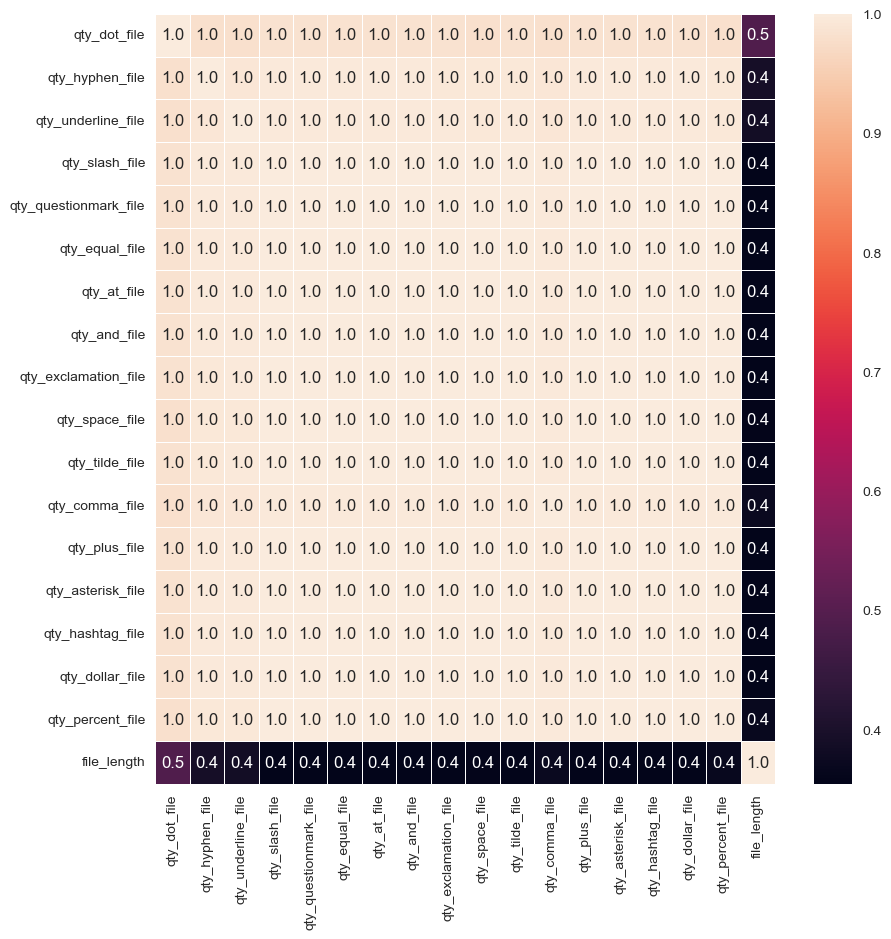

In [21]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X_train_modified[file_features].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'qty_dot_directory'),
  Text(1, 0, 'qty_hyphen_directory'),
  Text(2, 0, 'qty_underline_directory'),
  Text(3, 0, 'qty_slash_directory'),
  Text(4, 0, 'qty_questionmark_directory'),
  Text(5, 0, 'qty_equal_directory'),
  Text(6, 0, 'qty_at_directory'),
  Text(7, 0, 'qty_and_directory'),
  Text(8, 0, 'qty_exclamation_directory'),
  Text(9, 0, 'qty_space_directory'),
  Text(10, 0, 'qty_tilde_directory'),
  Text(11, 0, 'qty_comma_directory'),
  Text(12, 0, 'qty_plus_directory'),
  Text(13, 0, 'qty_asterisk_directory'),
  Text(14, 0, 'qty_hashtag_directory'),
  Text(15, 0, 'qty_dollar_directory'),
  Text(16, 0, 'qty_percent_directory'),
  Text(17, 0, 'directory_length')])

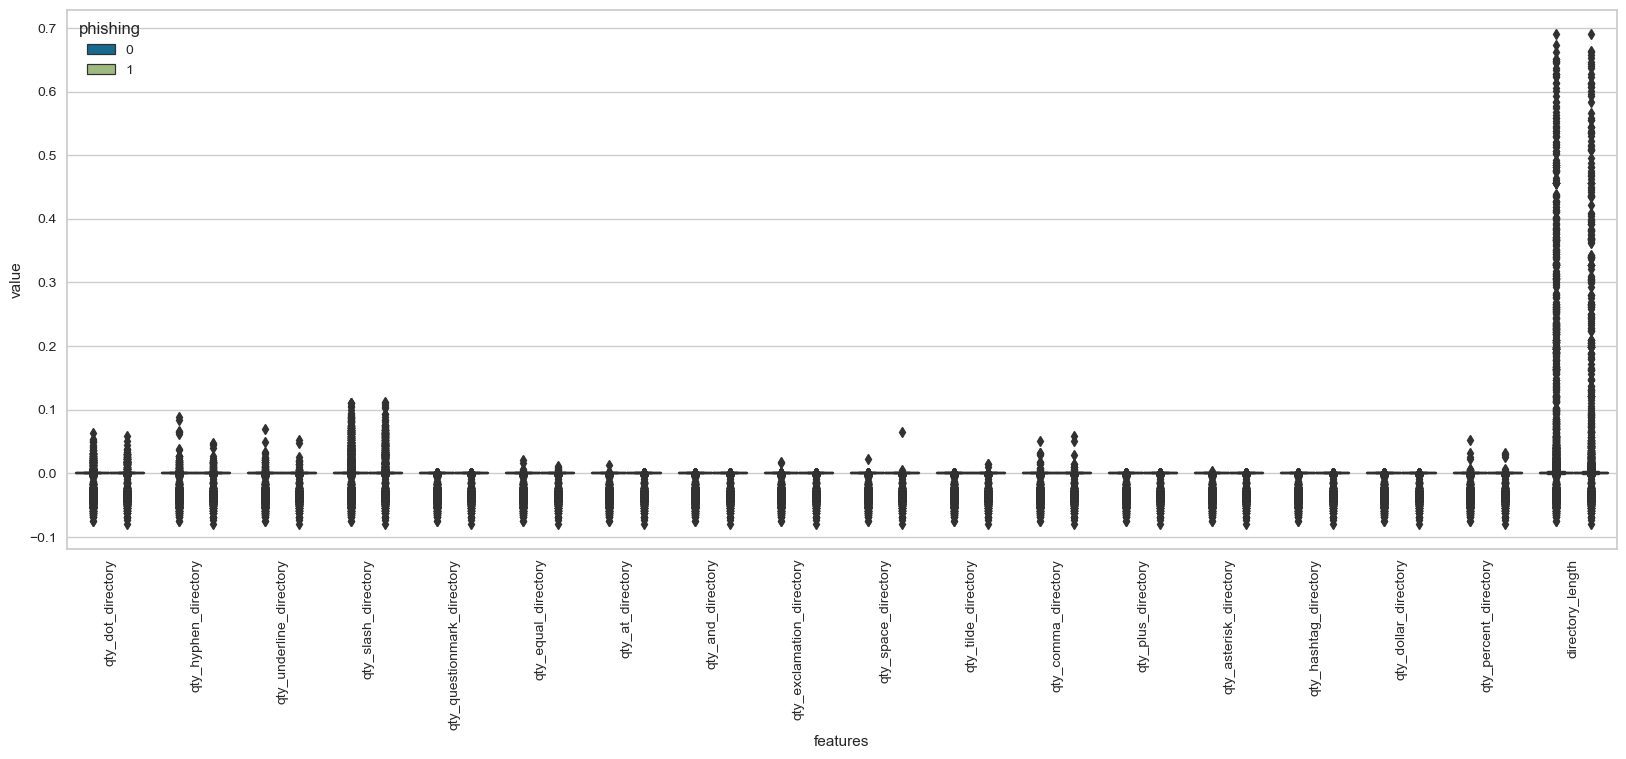

In [22]:
directory_features=[col for col in X_train.columns if 'directory' in col.lower()]
data_url = pd.concat([y,X_train_modified[directory_features]],axis=1)
data_url = pd.melt(data_url,id_vars="phishing",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,7))
sns.boxplot(x="features", y="value", hue="phishing", data=data_url)
plt.xticks(rotation=90)

<Axes: >

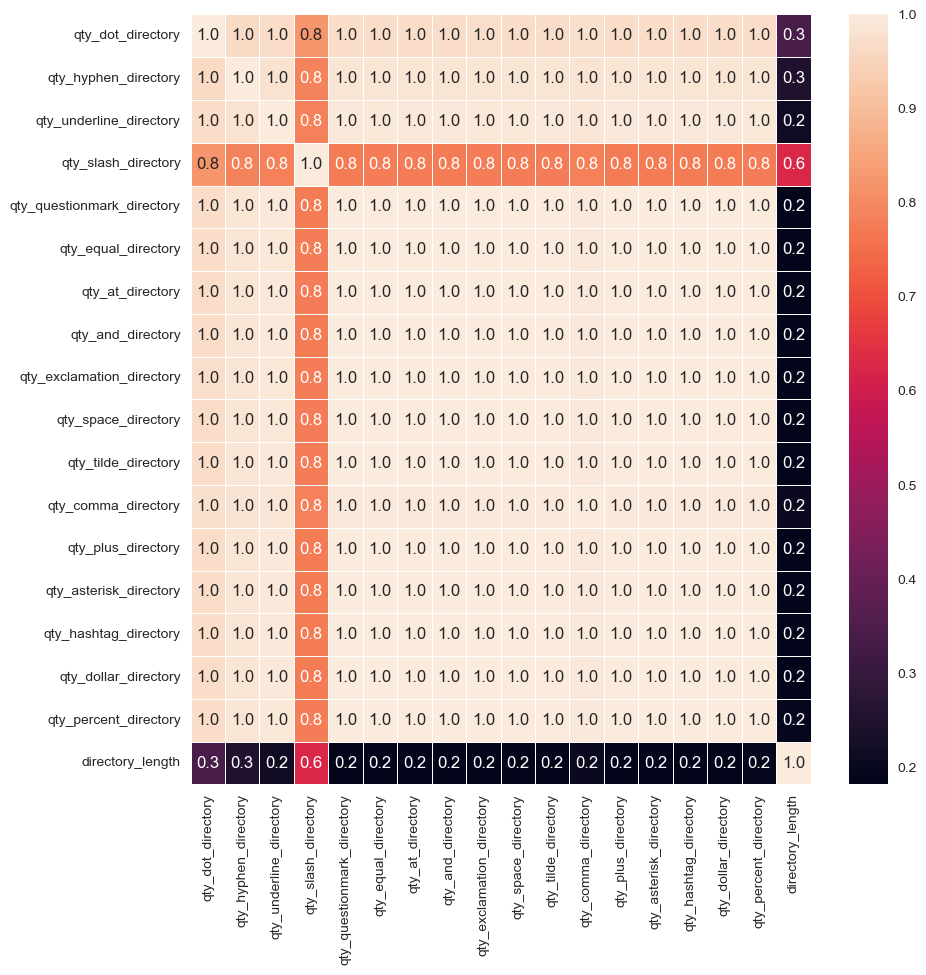

In [23]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X_train_modified[directory_features].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'qty_dot_params'),
  Text(1, 0, 'qty_hyphen_params'),
  Text(2, 0, 'qty_underline_params'),
  Text(3, 0, 'qty_slash_params'),
  Text(4, 0, 'qty_questionmark_params'),
  Text(5, 0, 'qty_equal_params'),
  Text(6, 0, 'qty_at_params'),
  Text(7, 0, 'qty_and_params'),
  Text(8, 0, 'qty_exclamation_params'),
  Text(9, 0, 'qty_space_params'),
  Text(10, 0, 'qty_tilde_params'),
  Text(11, 0, 'qty_comma_params'),
  Text(12, 0, 'qty_plus_params'),
  Text(13, 0, 'qty_asterisk_params'),
  Text(14, 0, 'qty_hashtag_params'),
  Text(15, 0, 'qty_dollar_params'),
  Text(16, 0, 'qty_percent_params'),
  Text(17, 0, 'params_length'),
  Text(18, 0, 'tld_present_params'),
  Text(19, 0, 'qty_params')])

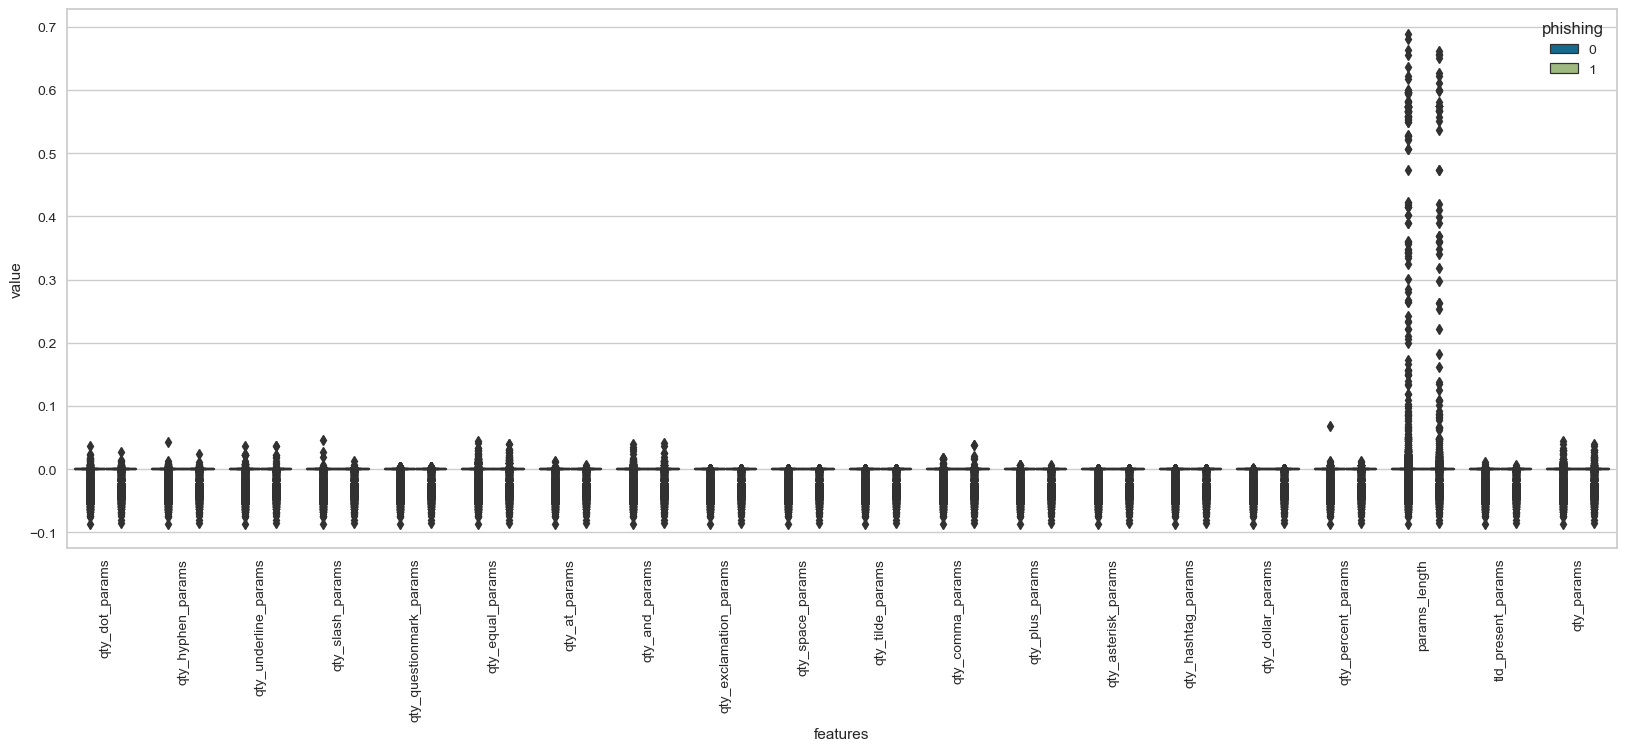

In [24]:
params_features=[col for col in X_train.columns if 'params' in col.lower()]
data_url = pd.concat([y,X_train_modified[params_features]],axis=1)
data_url = pd.melt(data_url,id_vars="phishing",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,7))
sns.boxplot(x="features", y="value", hue="phishing", data=data_url)
plt.xticks(rotation=90)

<Axes: >

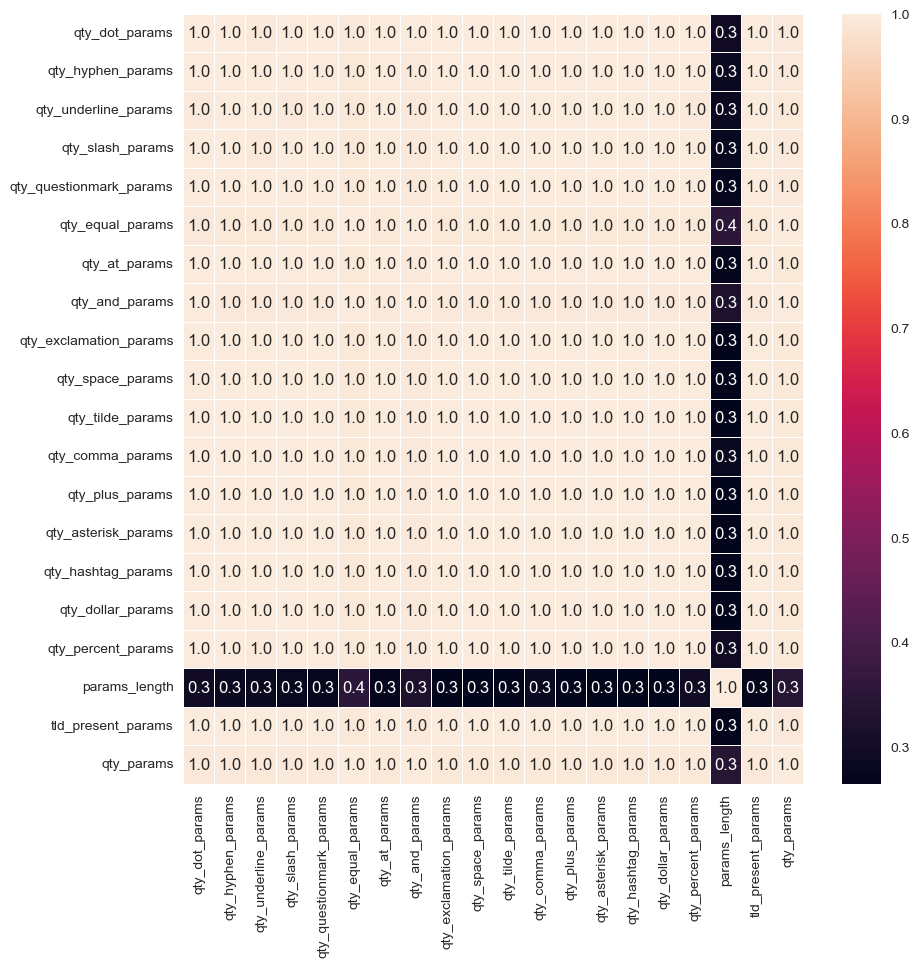

In [25]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X_train_modified[params_features].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'time_response'),
  Text(1, 0, 'asn_ip'),
  Text(2, 0, 'qty_ip_resolved'),
  Text(3, 0, 'qty_nameservers'),
  Text(4, 0, 'qty_mx_servers'),
  Text(5, 0, 'ttl_hostname'),
  Text(6, 0, 'tls_ssl_certificate'),
  Text(7, 0, 'qty_redirects')])

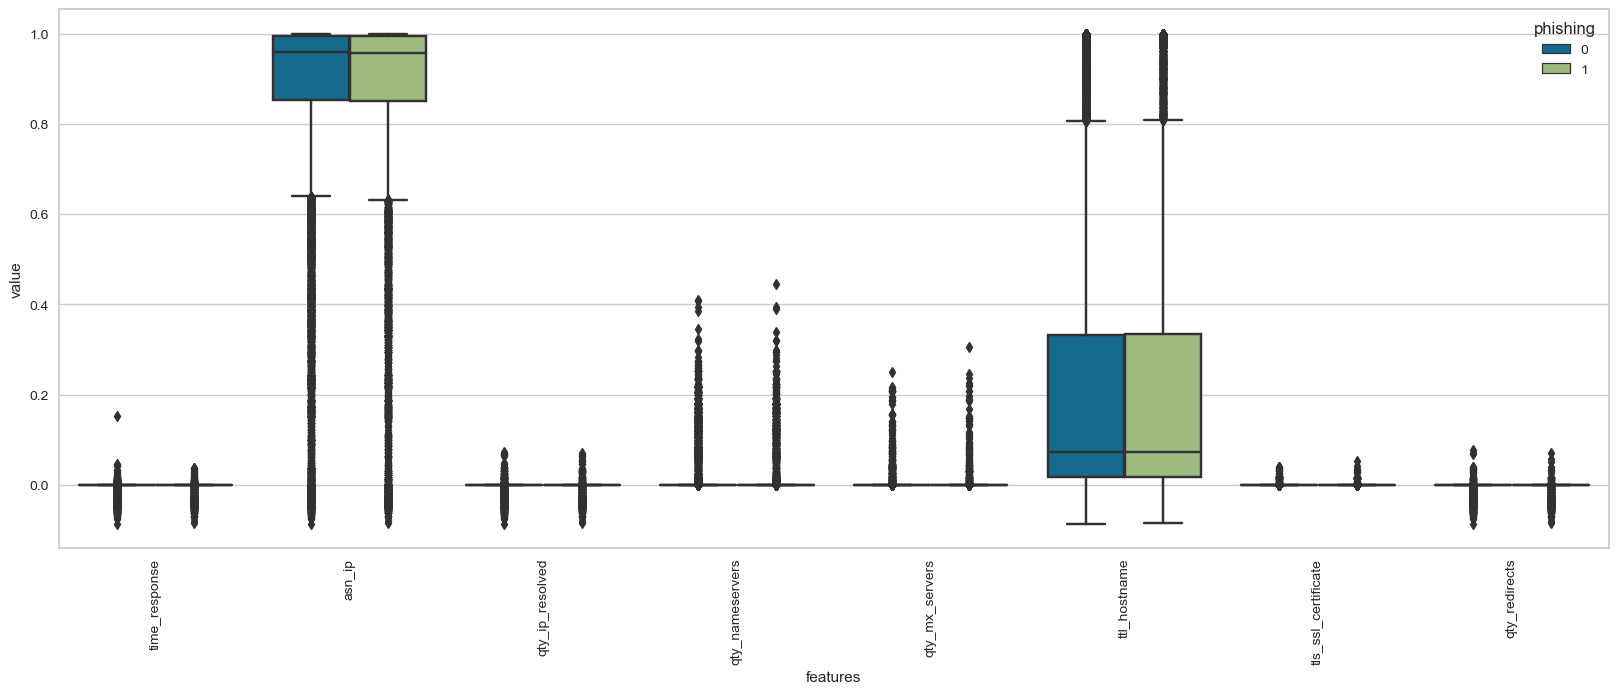

In [26]:
excluded_features = ['url', 'domain','params','directory','file']
filtered_features = [col for col in X_train_modified.columns if not any(keyword in col.lower() for keyword in excluded_features)]
data_url = pd.concat([y,X_train_modified[filtered_features]],axis=1)
data_url = pd.melt(data_url,id_vars="phishing",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,7))
sns.boxplot(x="features", y="value", hue="phishing", data=data_url)
plt.xticks(rotation=90)

<Axes: >

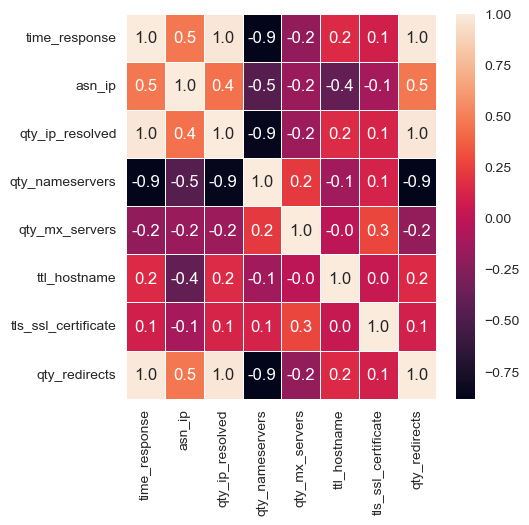

In [27]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(X_train_modified[filtered_features].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [8]:
X_train_modified

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,-0.154732,-0.291640,-0.173129,-0.677662,-0.082147,-0.215934,-0.074877,-0.15226,-0.033218,-0.014173,...,0.434436,-0.153538,0.927843,1.899629,3.305742,-1.014130,-0.438225,-0.023373,-0.031321,-0.074458
1,0.662633,-0.291640,-0.173129,-0.677662,-0.082147,-0.215934,-0.074877,-0.15226,-0.033218,-0.014173,...,3.287652,-0.153538,-0.585998,1.899629,0.736064,0.986067,0.841374,-0.023373,-0.031321,-0.074458
2,-0.154732,-0.291640,-0.173129,-0.677662,-0.082147,-0.215934,-0.074877,-0.15226,-0.033218,-0.014173,...,-0.594538,-0.153538,0.927843,-1.018752,-0.522589,0.986067,-0.438225,-0.023373,-0.031321,-0.074458
3,-0.154732,-0.291640,-0.173129,-0.677662,-0.082147,-0.215934,-0.074877,-0.15226,-0.033218,-0.014173,...,3.442334,-0.153538,0.170923,-0.435076,-0.227443,0.986067,0.841374,-0.023373,-0.031321,-0.074458
4,-0.154732,-0.291640,-0.173129,-0.677662,-0.082147,-0.215934,-0.074877,-0.15226,-0.033218,-0.014173,...,-0.417998,-0.153538,-0.585998,-0.435076,1.378193,0.986067,2.120973,-0.023373,-0.031321,-0.074458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70912,-0.154732,-0.291640,-0.173129,-0.677662,-0.082147,-0.215934,-0.074877,-0.15226,-0.033218,-0.014173,...,1.130506,-0.153538,-0.585998,1.899629,-0.521875,0.986067,-0.438225,-0.023373,-0.031321,-0.074458
70913,0.662633,-0.291640,-0.173129,-0.150696,-0.082147,-0.215934,-0.074877,-0.15226,-0.033218,-0.014173,...,-0.594538,-0.153538,-0.585998,-0.435076,-0.228157,-1.014130,2.120973,-0.023373,-0.031321,-0.074458
70914,-0.972097,0.588979,2.877247,2.484137,-0.082147,-0.215934,-0.074877,-0.15226,-0.033218,-0.014173,...,-0.370921,-0.153538,0.927843,-0.435076,0.274073,-1.014130,-0.438225,-0.023373,-0.031321,-0.074458
70915,-0.154732,-0.291640,-0.173129,-0.677662,-0.082147,-0.215934,-0.074877,-0.15226,-0.033218,-0.014173,...,0.610975,-0.153538,0.170923,1.315953,0.735974,0.986067,0.841374,-0.023373,-0.031321,-0.074458


In [5]:
def correlation(df,threshold):
    col_corr=set()
    corr_matrix=X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
result=correlation(X_train,0.7)
result2=correlation(X_test,0.7)
print("Number of hightly correlated features=", len(result), "\n")
print("Columns left= ", len(X_train.columns)-len(result), "\n")
X=X_train.drop(result,axis=1)
X_test_final=X_test.drop(result2,axis=1)
X

Number of hightly correlated features= 54 

Columns left=  44 



,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_exclamation_url,qty_space_url,qty_tilde_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
55124,2,0,0,0,0,0,0,0,0,0,...,611,1,4,5,43200,0,0,0,0,0
44575,3,0,0,0,0,0,0,0,0,0,...,2308,1,2,5,14399,1,1,0,0,0
87793,2,0,0,0,0,0,0,0,0,0,...,-1,1,4,0,292,1,0,0,0,0
5689,2,0,0,0,0,0,0,0,0,0,...,2400,1,3,1,3600,1,1,0,0,0
38932,2,0,0,0,0,0,0,0,0,0,...,104,1,2,1,21596,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2,0,0,0,0,0,0,0,0,0,...,1025,1,2,5,300,1,0,0,0,0
54886,3,0,0,1,0,0,0,0,0,0,...,-1,1,2,1,3592,0,2,0,0,0
76820,1,1,2,6,0,0,0,0,0,0,...,132,1,4,1,9221,0,0,0,0,0
860,2,0,0,0,0,0,0,0,0,0,...,716,1,3,4,14398,1,1,0,0,0


In [6]:
mi_scores1 = mutual_info_classif(X, y_train)
mi_scores1 = pd.Series(mi_scores1, name="MI Scores", index=X.columns)
mi_scores1 = mi_scores1.sort_values(ascending=False)


In [12]:
mi_scores1

qty_slash_url              0.421662
file_length                0.395016
qty_underline_directory    0.348288
time_domain_activation     0.226738
qty_percent_params         0.219854
qty_hyphen_params          0.218809
qty_slash_params           0.217117
qty_dot_domain             0.189861
qty_ip_resolved            0.186869
qty_nameservers            0.182232
qty_tld_url                0.177380
length_url                 0.174386
qty_mx_servers             0.174318
time_domain_expiration     0.161324
qty_dot_url                0.156177
qty_vowels_domain          0.151131
ttl_hostname               0.117315
tls_ssl_certificate        0.104144
asn_ip                     0.095286
qty_redirects              0.085667
domain_spf                 0.085156
qty_hyphen_url             0.077960
qty_equal_url              0.073765
qty_underline_url          0.047514
qty_hyphen_domain          0.027112
time_response              0.026128
qty_at_url                 0.017696
qty_percent_url            0

In [7]:
mi_scores1=mi_scores1[mi_scores1>0.05]
len(mi_scores1)

13

In [8]:
X=X[mi_scores1.index]

In [9]:
X_test_final=X_test_final[mi_scores1.index]

In [10]:
rfc= RandomForestClassifier()
rfc.fit(X,y_train)
y_pred=rfc.predict(X_test_final)
print("Accuracy Score for Random Forest Classifier:",accuracy_score(y_test,y_pred))

Accuracy Score for Random Forest Classifier: 0.9648618161308516


C:\Users\Dell\.anaconda\New folder\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


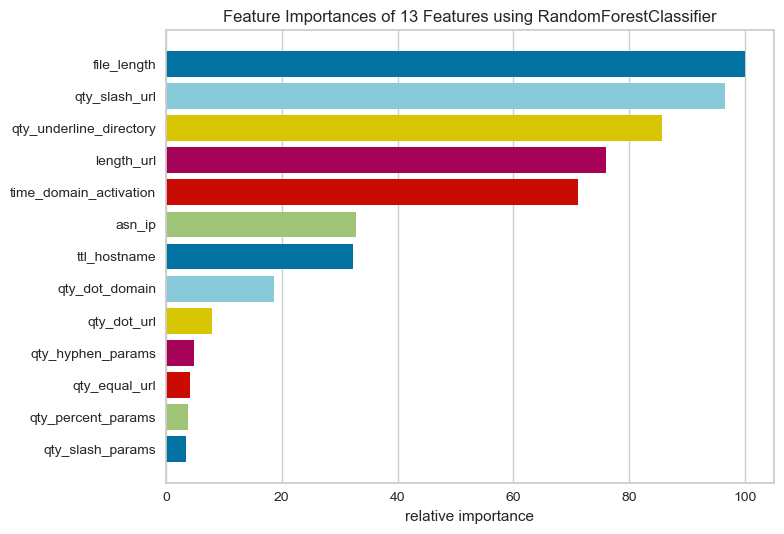

<Axes: title={'center': 'Feature Importances of 13 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [11]:
from yellowbrick.features import FeatureImportances
viz = FeatureImportances(rfc)
viz.fit(X, y_train)
viz.poof()

In [21]:
y_train_pred=rfc.predict(X)
y_pred=rfc.predict(X_test_final)

model_train_accuracy=accuracy_score(y_train,y_train_pred)
model_train_f1=f1_score(y_train,y_train_pred)
model_train_precision=precision_score(y_train,y_train_pred)
model_train_recall=recall_score(y_train,y_train_pred)
model_train_rocauc=roc_auc_score(y_train,y_train_pred)
            
model_test_accuracy=accuracy_score(y_test,y_pred)
model_test_f1=f1_score(y_test,y_pred)
model_test_precision=precision_score(y_test,y_pred)
model_test_recall=recall_score(y_test,y_pred)
model_test_rocauc=roc_auc_score(y_test,y_pred)
            
print("Model Performance Training")
print("Accuracy: {:.4f}".format(model_train_accuracy))
print("F1 Score:{:.4f}".format(model_train_f1))
print("Precision: {:.4f}".format(model_train_precision))
print("Recall: {:.4f}".format(model_train_recall))
print("ROC: {:.4f}".format(model_train_rocauc))
print("\n")
print("Model Performance Testing")
print("Accuracy: {:.4f}".format(model_test_accuracy))
print("F1 Score:{:.4f}".format(model_test_f1))
print("Precision: {:.4f}".format(model_test_precision))
print("Recall: {:.4f}".format(model_test_recall))
print("ROC: {:.4f}".format(model_test_rocauc))

Model Performance Training
Accuracy: 0.9999
F1 Score:0.9998
Precision: 0.9999
Recall: 0.9998
ROC: 0.9999


Model Performance Testing
Accuracy: 0.9699
F1 Score:0.9566
Precision: 0.9506
Recall: 0.9627
ROC: 0.9682


In [22]:
np.mean(cross_val_score(rfc,X,y_train,cv=10,scoring='accuracy'))

0.9712764040879254

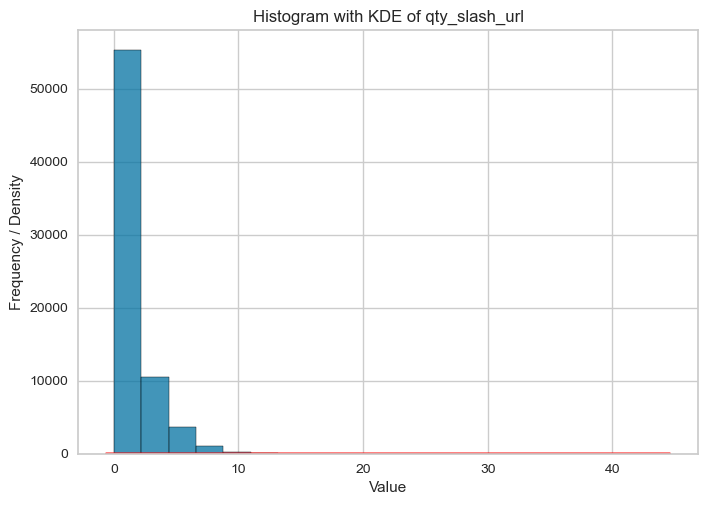

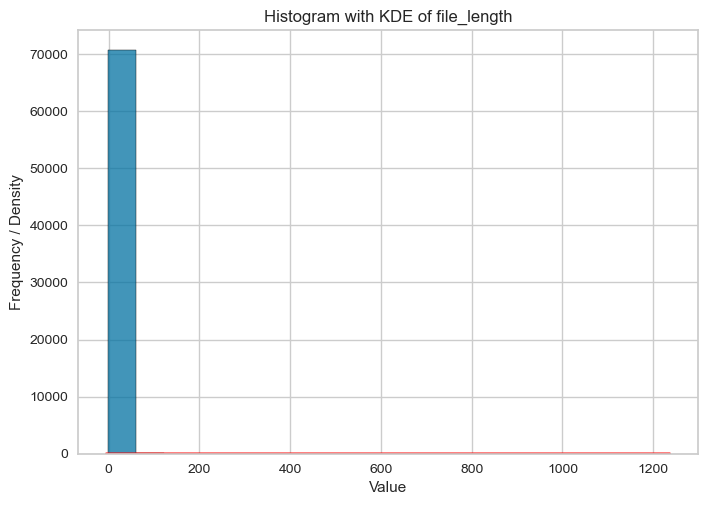

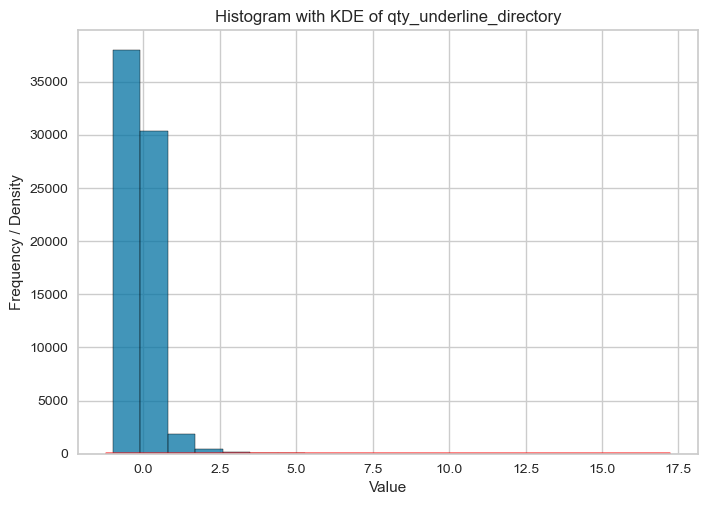

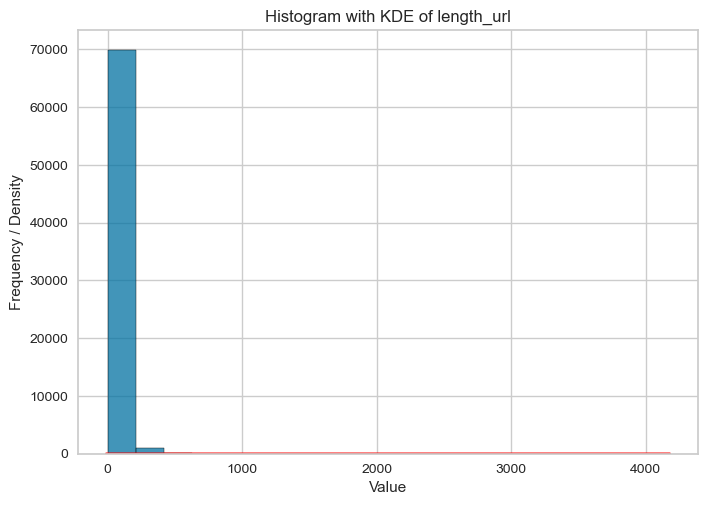

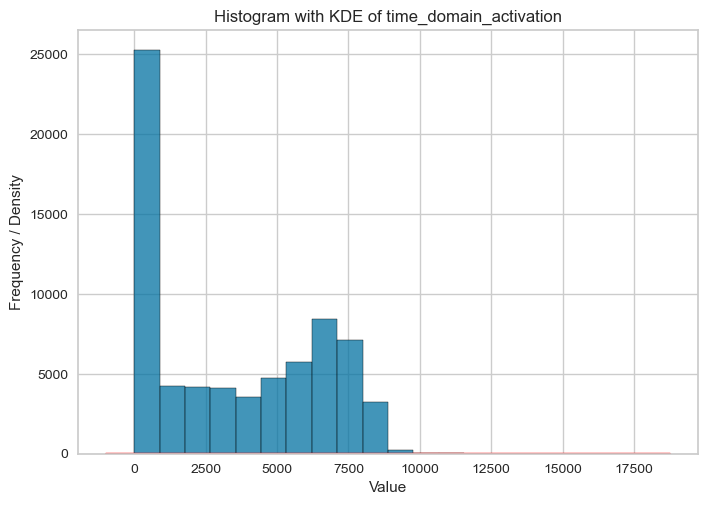

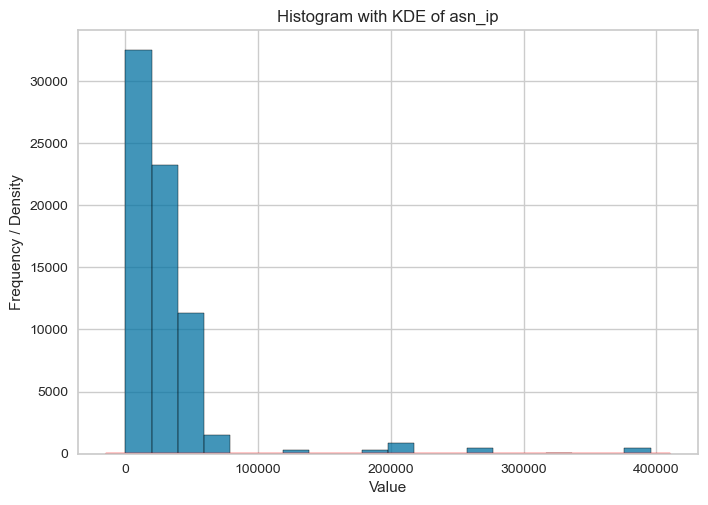

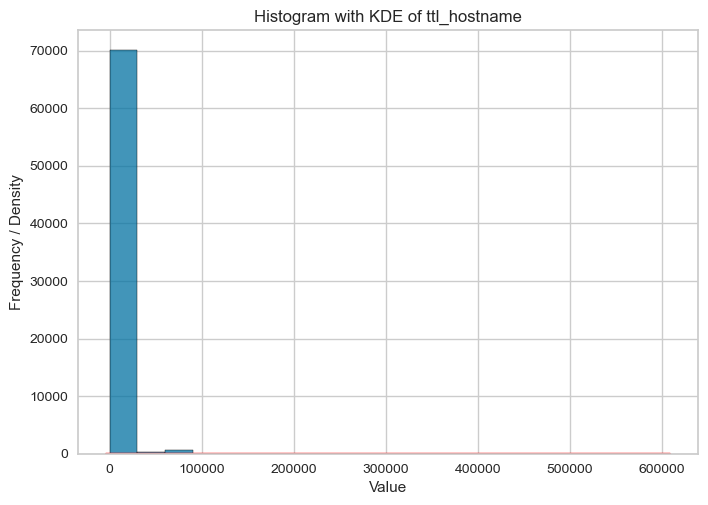

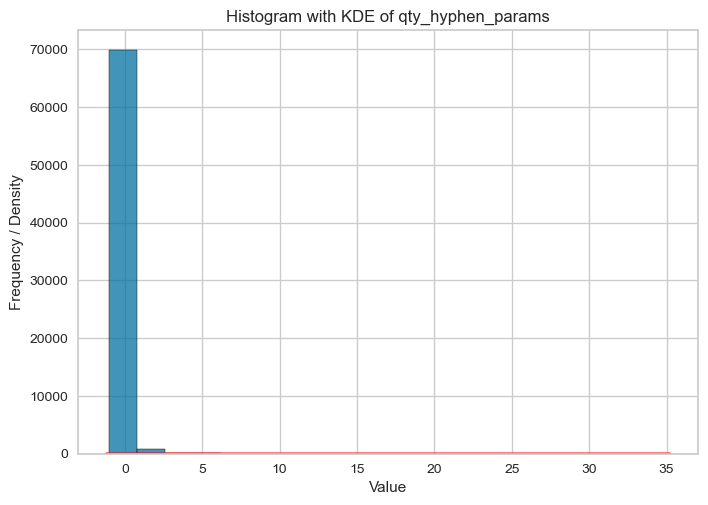

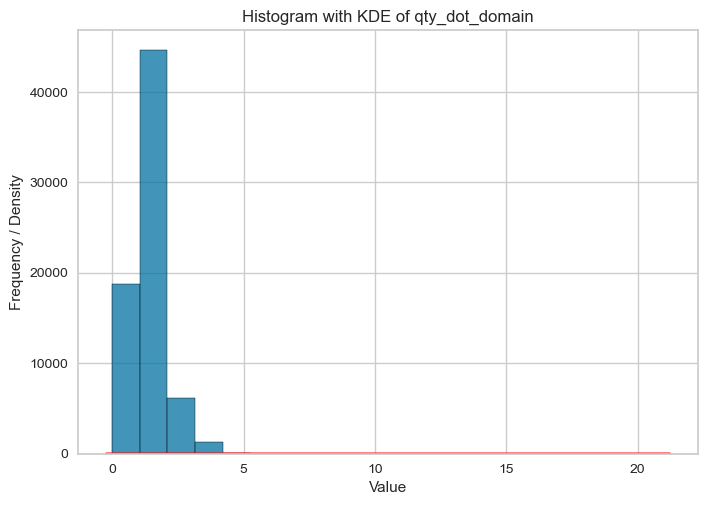

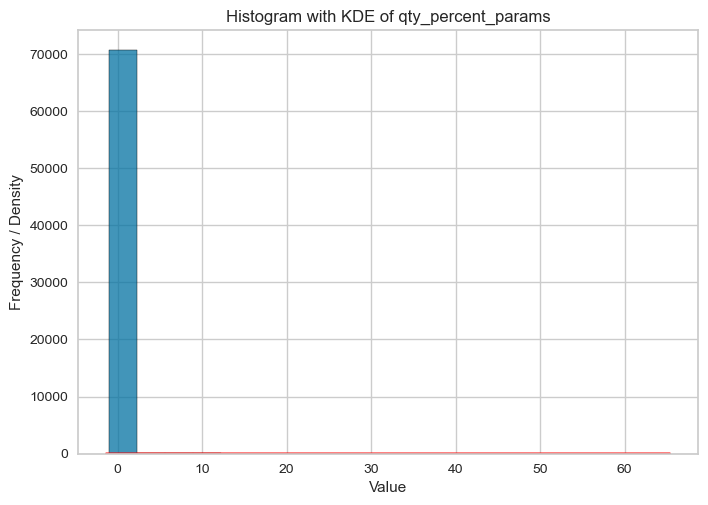

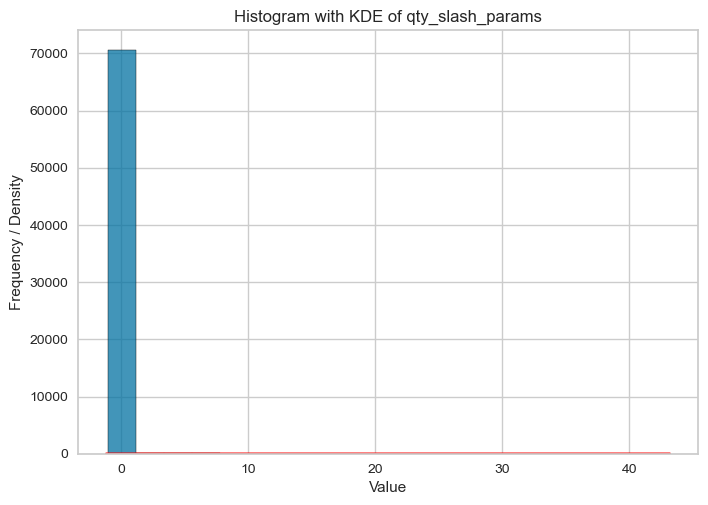

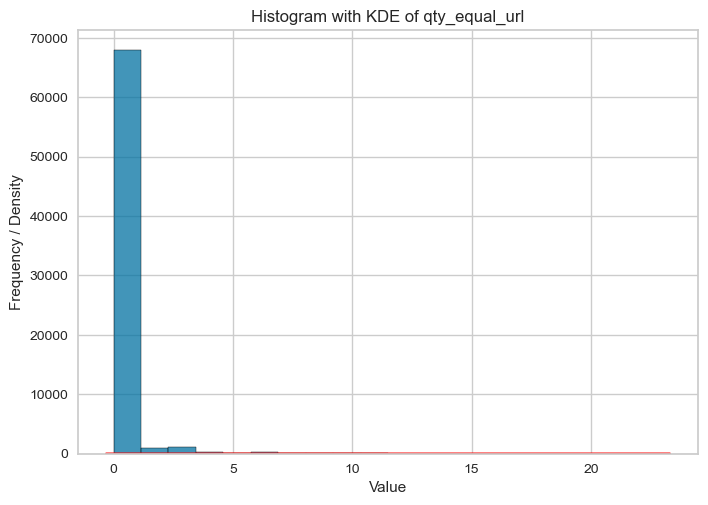

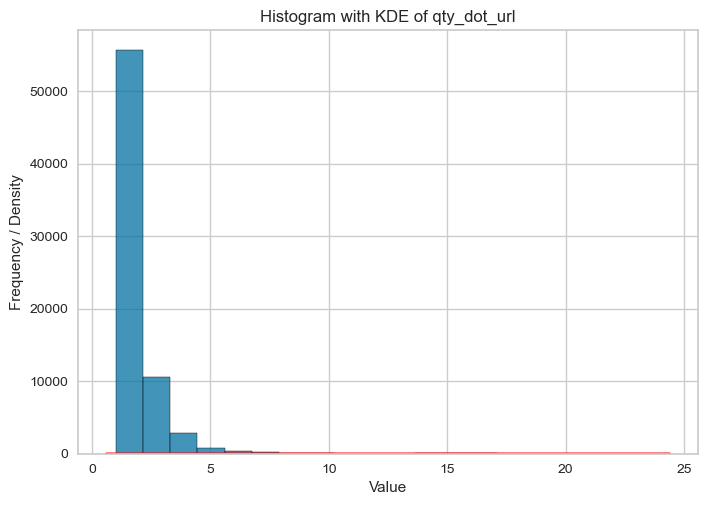

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


for column in X.columns:
    fig, ax = plt.subplots()
    sns.histplot(X[column], bins=20, kde=False, ax=ax)

    sns.kdeplot(X[column], color='red', ax=ax)

    plt.xlabel('Value')
    plt.ylabel('Frequency / Density')
    plt.title(f'Histogram with KDE of {column}')

    plt.show()